In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.4.1', '2.4.0')

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train, y_valid, y_train = X_train_full[:5000]/255, X_train_full[5000:]/255, y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255
class_names = [" T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

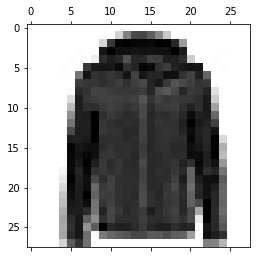

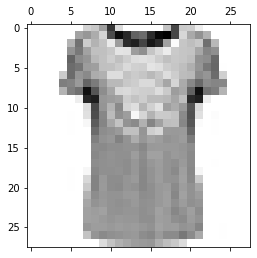

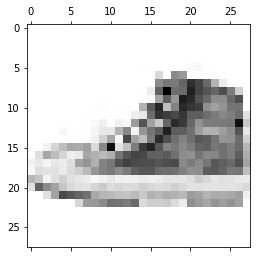

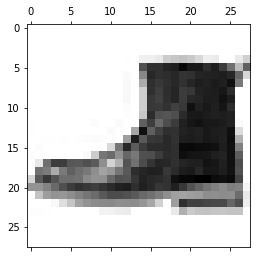

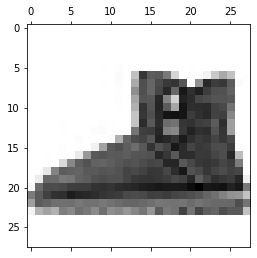

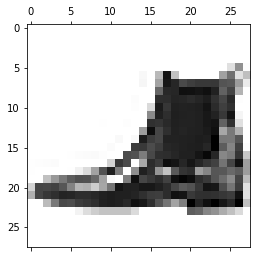

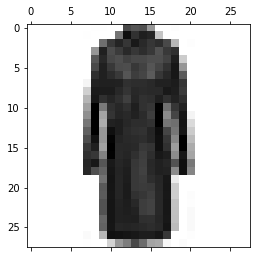

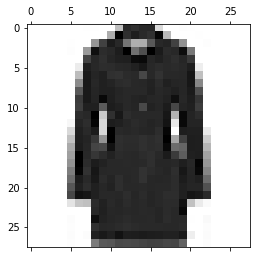

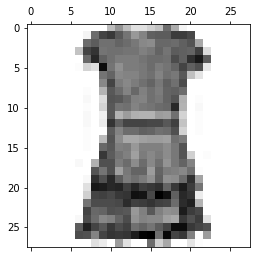

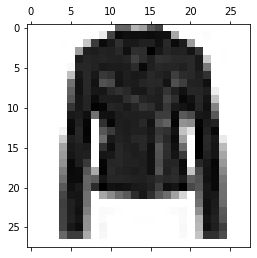

In [3]:
for i in range(10):
    plt.matshow(X_train[i], cmap='binary')

# Sequential Multilayer Perceptron:

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

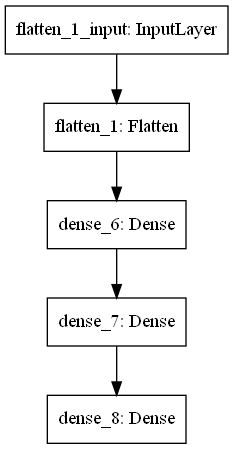

In [12]:
keras.utils.plot_model(model)

####  Tuning learning rate:

In [6]:
optimizer=keras.optimizers.SGD(lr=0.01) # This is the defualt learning rate

### Training and evaluating the model

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0006 - accuracy: 0.6771 - val_loss: 0.5208 - val_accuracy: 0.8224
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5032 - accuracy: 0.8265 - val_loss: 0.4831 - val_accuracy: 0.8368
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4500 - accuracy: 0.8435 - val_loss: 0.4209 - val_accuracy: 0.8542
Epoch 4/10
1719/1719 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.85 - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8552 - val_loss: 0.3997 - val_accuracy: 0.8602
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3955 - accuracy: 0.8618 - val_loss: 0.3916 - val_accuracy: 0.8642
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8677 - val_loss: 0.3779 - val_accuracy: 0.8714
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3624 - accuracy:

In [8]:
history2 = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3249 - accuracy: 0.8844 - val_loss: 0.3321 - val_accuracy: 0.8804
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3160 - accuracy: 0.8871 - val_loss: 0.3362 - val_accuracy: 0.8774
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3093 - accuracy: 0.8891 - val_loss: 0.3303 - val_accuracy: 0.8816
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3023 - accuracy: 0.8924 - val_loss: 0.3295 - val_accuracy: 0.8818
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2958 - accuracy: 0.8938 - val_loss: 0.3287 - val_accuracy: 0.8800
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2899 - accuracy: 0.8961 - val_loss: 0.3292 - val_accuracy: 0.8826
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.8971 - val_loss: 0.3115 - val_accuracy:

In [9]:
# From the above two cells, we see that when we call the fit() method again, we start from where we left off.

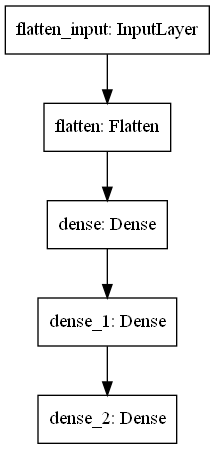

In [10]:
keras.utils.plot_model(model)

In [11]:
history = pd.DataFrame(history.history)
history2 = pd.DataFrame(history2.history)

In [12]:
full_history = pd.concat([history, history2], ignore_index=True)

((0.0, 1.0), (0.0, 29.0))

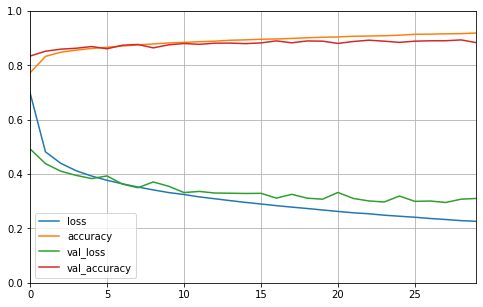

In [13]:
# Plotting the learning curve using the history attribute
full_history.plot(figsize=(8, 5))
plt.grid(1)
plt.gca().set_ylim(0, 1), plt.gca().set_xlim(0, 29) # This does the same as below
#plt.axis([0, 29, 0, 1]) 

In [14]:
# Finally, we evaluate the model:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 712us/step - loss: 0.3448 - accuracy: 0.8782


[0.34475281834602356, 0.8781999945640564]

In [15]:
# making predictions:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)

['Ankle boot' 'Pullover' 'Trouser'] [' T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


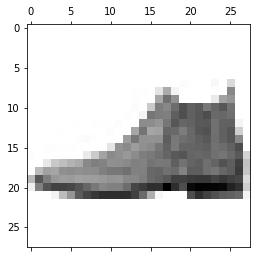

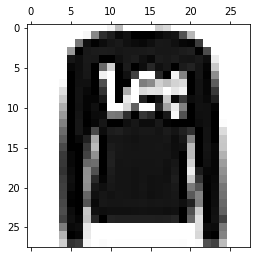

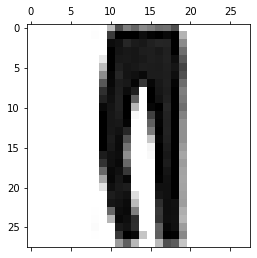

In [16]:
print(np.array(class_names)[y_pred], class_names)
for i in X_new:
    plt.matshow(i, cmap='binary')

In [17]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
y_pred == y_test[:3]  # Thus, our predictions are correct

array([ True,  True,  True])

## Building a Regression MLP:

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train)
X_valid = scaler.transform( X_valid)
X_test = scaler.transform( X_test)

In [20]:
reg_model = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1:])), keras.layers.Dense(1)])
reg_model.compile(loss='mean_squared_error', optimizer='sgd')
reg_history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 973us/step - loss: 1.3151 - val_loss: 0.5753
Epoch 2/20
363/363 [==============================] - 0s 610us/step - loss: 0.5970 - val_loss: 0.6505
Epoch 3/20
363/363 [==============================] - 0s 567us/step - loss: 0.4687 - val_loss: 0.5250
Epoch 4/20
363/363 [==============================] - 0s 558us/step - loss: 0.4391 - val_loss: 0.4570
Epoch 5/20
363/363 [==============================] - 0s 584us/step - loss: 0.4419 - val_loss: 0.4877
Epoch 6/20
363/363 [==============================] - 0s 571us/step - loss: 0.4145 - val_loss: 0.6835
Epoch 7/20
363/363 [==============================] - 0s 559us/step - loss: 0.4457 - val_loss: 0.4326
Epoch 8/20
363/363 [==============================] - 0s 566us/step - loss: 0.4044 - val_loss: 0.4363
Epoch 9/20
363/363 [==============================] - 0s 569us/step - loss: 0.4031 - val_loss: 0.5602
Epoch 10/20
363/363 [==============================] - 0s 559us/step - loss: 0.430

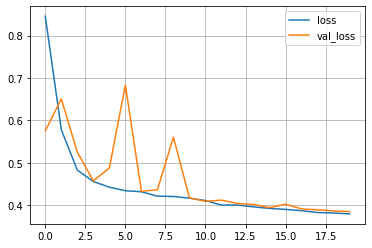

In [21]:
pd.DataFrame(reg_history.history).plot()
plt.grid(1)

In [22]:
mse_test = reg_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 369us/step - loss: 0.3819


## Building complex models using the Functional API:
It's called "functional" API because the models are built by calling functions.

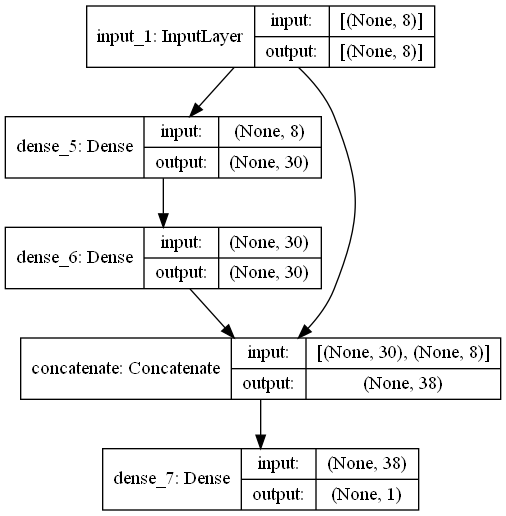

In [23]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([hidden2, input_])
output = keras.layers.Dense(1)(concat)
wide_model = keras.Model(inputs=[input_], outputs=[output])

keras.utils.plot_model(wide_model, show_shapes=True)

### Making a model with multiple inputs:

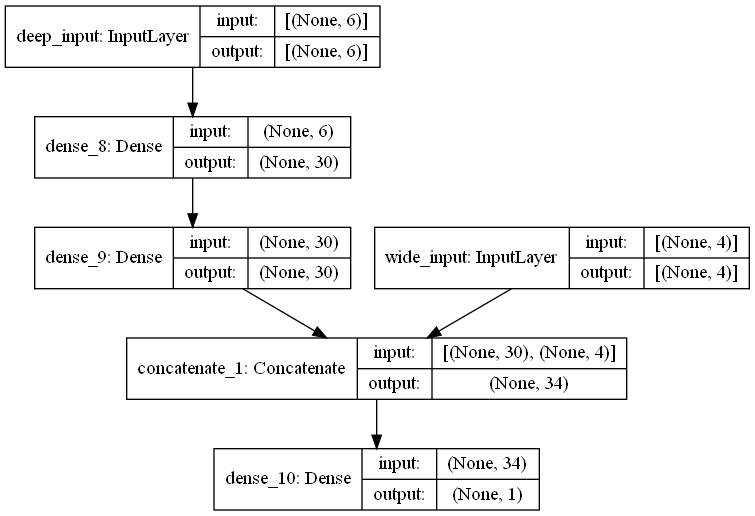

In [28]:
# Pretend we have a dataset with ten different features.
# The following model has different processing paths for features 0 through 4 and 2 through 7.

X_trainA, X_trainB = X_train[:, :4], X_train[:, 2:]
X_validA, X_validB = X_valid[:, :4], X_valid[:, 2:]
X_testA, X_testB = X_test[:, :4], X_test[:, 2:]
X_newA, X_newB = X_test[:, :4][:3], X_test[:, 2:][:3]

inputA = keras.layers.Input(shape=X_trainA.shape[1:], name='wide_input')
inputB = keras.layers.Input(shape=X_trainB.shape[1:], name='deep_input')
Hidden1 = keras.layers.Dense(30, activation='relu') (inputB)
Hidden2 = keras.layers.Dense(30, activation='relu') (Hidden1)
con = keras.layers.Concatenate() ([Hidden2, inputA])
out = keras.layers.Dense(1) (con)
wide_model_2 = keras.Model(inputs=[inputA, inputB], outputs=[out])

keras.utils.plot_model(wide_model_2, show_shapes=1)

In [29]:
# Since we have multiple inputs, we have to do training differently, that is, we have to split the inputs:
wide_model_2.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

history_wide = wide_model_2.fit((X_trainA, X_trainB), y_train, epochs=20, validation_data=((X_validA, X_validB), y_valid))
mse_test = wide_model_2.evaluate((X_testA, X_testB), y_test)

Epoch 1/20
363/363 [==============================] - 1s 867us/step - loss: 2.8543 - val_loss: 0.8342
Epoch 2/20
363/363 [==============================] - 0s 621us/step - loss: 0.7630 - val_loss: 0.7101
Epoch 3/20
363/363 [==============================] - 0s 636us/step - loss: 0.6622 - val_loss: 0.6545
Epoch 4/20
363/363 [==============================] - 0s 654us/step - loss: 0.6459 - val_loss: 0.6226
Epoch 5/20
363/363 [==============================] - 0s 655us/step - loss: 0.6135 - val_loss: 0.5918
Epoch 6/20
363/363 [==============================] - 0s 696us/step - loss: 0.5863 - val_loss: 0.5707
Epoch 7/20
363/363 [==============================] - 0s 611us/step - loss: 0.5707 - val_loss: 0.5535
Epoch 8/20
363/363 [==============================] - 0s 620us/step - loss: 0.5597 - val_loss: 0.5389
Epoch 9/20
363/363 [==============================] - 0s 611us/step - loss: 0.5434 - val_loss: 0.5285
Epoch 10/20
363/363 [==============================] - 0s 619us/step - loss: 0.523

####  Modifying above model to have multiple outputs:

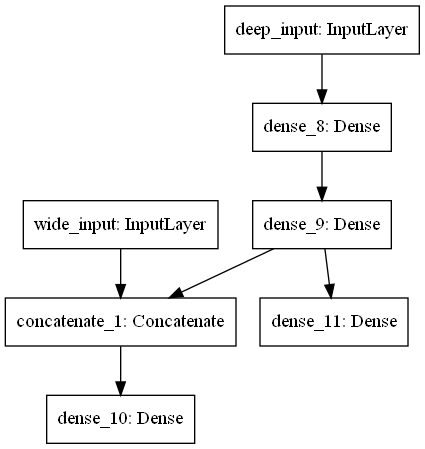

In [30]:
aux_out = keras.layers.Dense(1) (Hidden2)
wide_outs_model = keras.Model(inputs=[inputA, inputB], outputs=[out, aux_out])
keras.utils.plot_model(wide_outs_model)

In [31]:
# So, we can have a different loss function for each output layer and we can weight their losses
wide_outs_model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

# Notice that we have to pass the labels for each output layer:
wide_outs_model.fit((X_trainA, X_trainB), (y_train, y_train), epochs=20, validation_data=((X_validA, X_validB), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7477 - dense_10_loss: 0.5103 - dense_11_loss: 2.8847 - val_loss: 0.5816 - val_dense_10_loss: 0.5117 - val_dense_11_loss: 1.2107
Epoch 2/20
363/363 [==============================] - 0s 739us/step - loss: 0.6182 - dense_10_loss: 0.5560 - dense_11_loss: 1.1775 - val_loss: 0.5453 - val_dense_10_loss: 0.4925 - val_dense_11_loss: 1.0198
Epoch 3/20
363/363 [==============================] - 0s 721us/step - loss: 0.5410 - dense_10_loss: 0.4925 - dense_11_loss: 0.9768 - val_loss: 0.5306 - val_dense_10_loss: 0.4945 - val_dense_11_loss: 0.8559
Epoch 4/20
363/363 [==============================] - 0s 795us/step - loss: 0.5097 - dense_10_loss: 0.4721 - dense_11_loss: 0.8480 - val_loss: 0.4894 - val_dense_10_loss: 0.4587 - val_dense_11_loss: 0.7660
Epoch 5/20
363/363 [==============================] - 0s 716us/step - loss: 0.4780 - dense_10_loss: 0.4468 - dense_11_loss: 0.7592 - val_loss: 0.4857 - val_dense_10_loss: 0.4587 

In [32]:
y_pred, y_aux_pred = wide_outs_model.predict((X_newA, X_newB))

total_loss, main_loss, aux_loss = wide_outs_model.evaluate((X_testA, X_testB), (y_test, y_test))
np.array([total_loss, main_loss, aux_loss]).round(3)

162/162 [==============================] - 0s 467us/step - loss: 0.3762 - dense_10_loss: 0.3641 - dense_11_loss: 0.4857


array([0.376, 0.364, 0.486])

##  Using the Subclass API to Build Dynamic Models

In [36]:
# class WideAndDeepModel(keras.Model):
#     def __init__(self, units=30, activation='relu', **kwargs):
#         super().__init__(**kwargs) # handles standard arguments, eg, name
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)
        
#     def call(self, inputs):
#         inputA, inputB = inputs
#         hidden1 = self.hidden1 (inputB)
#         hidden2 = self.hidden2 (hidden1)
#         concat = keras.layers.Concatenate() ([hidden2, inputA])
#         main_output = self.main_output (concat)
#         aux_output = self.aux_output (hidden2)
#         return main_output, aux_output

# model = WideAndDeepModel()
# main_out, aux_out = model.call([X_trainA, X_trainB])

## Saving and restoring a model:

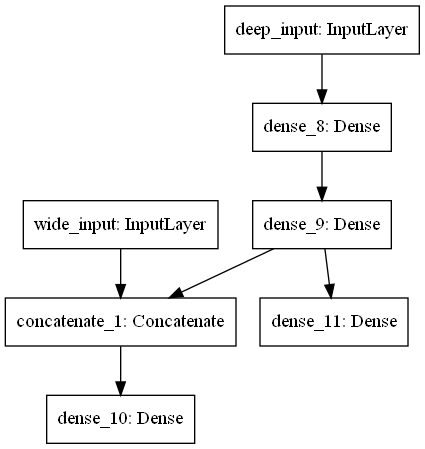

In [35]:
# Saving the most recent model:
wide_outs_model.save('wide_outs_model.h5')

# Then, we can load the model with the following code:
loaded_model = keras.models.load_model('wide_outs_model.h5')

keras.utils.plot_model(loaded_model)

#### Implementing early stopping and automatic saving
If we are training our model on a very large dataset, then training may take very long. If so, periodically saving the model would be a good idea, in case the computer crashes. Hence, we do just that.

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train, y_valid, y_train = X_train_full[:5000]/255, X_train_full[5000:]/255, y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

# The "ModelCheckpoint" callback saves checkpoints of the model by default at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

# Further, if we are fitting with a validation set, then we can toggle a parameter in ModelCheckpoint
# so that we only save the best model, i.e., the model that performs the best on the validation data
earlySaving_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[earlySaving_cb])
best_model = keras.models.load_model('my_keras_model.h5') # Rolls back to best model

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9701 - accuracy: 0.6978
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5040 - accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4499 - accuracy: 0.8430
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8531
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3960 - accuracy: 0.8622
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3748 - accuracy: 0.8671
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3632 - accuracy: 0.8717
Epoch 8/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3558 - accuracy: 0.8737
Epoch 9/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8795
Epoch 10/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.330

Even better, we can just implement the early stopping callback, which causes training to stop as soon as progress has not been made on the validation set for more than *patience* epochs, i.e., whatever value we assign to patience determines when we stop after no progress has been made on the validation set.

In [7]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2646 - accuracy: 0.9046 - val_loss: 0.3128 - val_accuracy: 0.8846
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9066 - val_loss: 0.3002 - val_accuracy: 0.8900
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9080 - val_loss: 0.3143 - val_accuracy: 0.8850
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2511 - accuracy: 0.9083 - val_loss: 0.3026 - val_accuracy: 0.8900
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.3166 - val_accuracy: 0.8868
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2422 - accuracy: 0.9131 - val_loss: 0.3002 - val_accuracy: 0.8930
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2394 - accuracy: 0.9149 - val_loss: 0.3063 - val_ac

# Using TensorBoard for visualizations:

We can use a Tensorflow feature called TensorBoard to visualize many features of our neural networks. The following code automatically saves the files we need for the visualization. Then, within the Jupyter notebook, we call:

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [9]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1849 - accuracy: 0.9333 - val_loss: 0.2994 - val_accuracy: 0.8982
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1835 - accuracy: 0.9348 - val_loss: 0.2908 - val_accuracy: 0.8960
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1787 - accuracy: 0.9368 - val_loss: 0.2864 - val_accuracy: 0.8944
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1764 - accuracy: 0.9375 - val_loss: 0.3133 - val_accuracy: 0.8900
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1735 - accuracy: 0.9387 - val_loss: 0.2967 - val_accuracy: 0.8910
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1708 - accuracy: 0.9393 - val_loss: 0.2881 - val_accuracy: 0.8954
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1687 - accuracy: 0.9403 - val_loss: 0.2921 - val_accuracy:

In [10]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

# Fine-tuning Network Hyperparameters

Our first approach to finding better hyperparameters is to use randomized search from scikit learn, which is done just as we did grid search cv. However, we choose to use randomized search because there are far more hyperparameters than in the ML models we've used prior to ANNs.

To do the search through hyperparameter space, we have to design a function that builds a neural network with different hyperparameters, and then we do randomized search on the arguments that we can input into the function.

In [1]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train)
X_valid = scaler.transform( X_valid)
X_test = scaler.transform( X_test)

In [25]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# This is a "thin wrapper" around the underlying keras model, which allows us to use scikit learn stuff

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)  # Note: scikit learn returns the highest score, whereas keras minimizes the loss

Epoch 1/100
363/363 [==============================] - 1s 882us/step - loss: 2.0576 - val_loss: 0.8907
Epoch 2/100
363/363 [==============================] - 0s 630us/step - loss: 0.6206 - val_loss: 0.6138
Epoch 3/100
363/363 [==============================] - 0s 574us/step - loss: 0.5403 - val_loss: 0.5365
Epoch 4/100
363/363 [==============================] - 0s 597us/step - loss: 0.4737 - val_loss: 0.4959
Epoch 5/100
363/363 [==============================] - 0s 573us/step - loss: 0.4787 - val_loss: 0.4843
Epoch 6/100
363/363 [==============================] - 0s 604us/step - loss: 0.4615 - val_loss: 0.4720
Epoch 7/100
363/363 [==============================] - 0s 573us/step - loss: 0.4244 - val_loss: 0.4598
Epoch 8/100
363/363 [==============================] - 0s 572us/step - loss: 0.4223 - val_loss: 0.4498
Epoch 9/100
363/363 [==============================] - 0s 573us/step - loss: 0.4307 - val_loss: 0.4517
Epoch 10/100
363/363 [==============================] - 0s 582us/step - l

Epoch 80/100
363/363 [==============================] - 0s 566us/step - loss: 0.3373 - val_loss: 0.3773
Epoch 81/100
363/363 [==============================] - 0s 582us/step - loss: 0.3458 - val_loss: 0.3780
Epoch 82/100
363/363 [==============================] - 0s 551us/step - loss: 0.3345 - val_loss: 0.3774
Epoch 83/100
363/363 [==============================] - 0s 556us/step - loss: 0.3388 - val_loss: 0.3698
Epoch 84/100
363/363 [==============================] - 0s 554us/step - loss: 0.3379 - val_loss: 0.3724
Epoch 85/100
363/363 [==============================] - 0s 565us/step - loss: 0.3380 - val_loss: 0.3760
Epoch 86/100
363/363 [==============================] - 0s 568us/step - loss: 0.3323 - val_loss: 0.3818
Epoch 87/100
363/363 [==============================] - 0s 556us/step - loss: 0.3461 - val_loss: 0.3691
Epoch 88/100
363/363 [==============================] - 0s 552us/step - loss: 0.3220 - val_loss: 0.3717
Epoch 89/100
363/363 [==============================] - 0s 556us

In [29]:
# Now, implementing the randomized search
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {"n_hidden":[0, 1, 2, 3], "n_neurons": np.arange(1, 100), "learning_rate": reciprocal(3e-4, 3e-2)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.5972 - val_loss: 0.7125
Epoch 2/100
242/242 [==============================] - 0s 864us/step - loss: 0.6709 - val_loss: 0.5818
Epoch 3/100
242/242 [==============================] - 0s 792us/step - loss: 0.5398 - val_loss: 0.5327
Epoch 4/100
242/242 [==============================] - 0s 811us/step - loss: 0.4954 - val_loss: 0.4881
Epoch 5/100
242/242 [==============================] - 0s 810us/step - loss: 0.4581 - val_loss: 0.4604
Epoch 6/100
242/242 [==============================] - 0s 839us/step - loss: 0.4151 - val_loss: 0.4406
Epoch 7/100
242/242 [==============================] - 0s 786us/step - loss: 0.3909 - val_loss: 0.4328
Epoch 8/100
242/242 [==============================] - 0s 751us/step - loss: 0.3999 - val_loss: 0.4263
Epoch 9/100
242/242 [==============================] - 0s 775us/step - loss: 0.3740 - val_loss: 0.4159
Epoch 10/100
242/242 [==============================] - 0s 783us/step - los

Epoch 80/100
242/242 [==============================] - 0s 769us/step - loss: 0.2844 - val_loss: 0.3414
Epoch 81/100
242/242 [==============================] - 0s 738us/step - loss: 0.2805 - val_loss: 0.3264
Epoch 82/100
242/242 [==============================] - 0s 752us/step - loss: 0.2847 - val_loss: 0.3490
Epoch 83/100
242/242 [==============================] - 0s 762us/step - loss: 0.2788 - val_loss: 0.3258
Epoch 84/100
242/242 [==============================] - 0s 758us/step - loss: 0.2748 - val_loss: 0.3388
Epoch 85/100
242/242 [==============================] - 0s 735us/step - loss: 0.2705 - val_loss: 0.3329
Epoch 86/100
242/242 [==============================] - 0s 810us/step - loss: 0.2765 - val_loss: 0.3275
Epoch 87/100
242/242 [==============================] - 0s 747us/step - loss: 0.2781 - val_loss: 0.3382
Epoch 88/100
242/242 [==============================] - 0s 759us/step - loss: 0.2703 - val_loss: 0.3287
Epoch 89/100
242/242 [==============================] - 0s 727us

242/242 [==============================] - 0s 722us/step - loss: 0.4475 - val_loss: 0.4814
Epoch 34/100
242/242 [==============================] - 0s 713us/step - loss: 0.4548 - val_loss: 0.4778
Epoch 35/100
242/242 [==============================] - 0s 718us/step - loss: 0.4275 - val_loss: 0.4738
Epoch 36/100
242/242 [==============================] - 0s 746us/step - loss: 0.4302 - val_loss: 0.4702
Epoch 37/100
242/242 [==============================] - 0s 727us/step - loss: 0.4433 - val_loss: 0.4678
Epoch 38/100
242/242 [==============================] - 0s 715us/step - loss: 0.4241 - val_loss: 0.4658
Epoch 39/100
242/242 [==============================] - 0s 719us/step - loss: 0.4159 - val_loss: 0.4605
Epoch 40/100
242/242 [==============================] - 0s 732us/step - loss: 0.4137 - val_loss: 0.4610
Epoch 41/100
242/242 [==============================] - 0s 733us/step - loss: 0.4259 - val_loss: 0.4579
Epoch 42/100
242/242 [==============================] - 0s 720us/step - loss:

Epoch 90/100
242/242 [==============================] - 0s 728us/step - loss: 0.3787 - val_loss: 0.4123
Epoch 91/100
242/242 [==============================] - 0s 724us/step - loss: 0.3642 - val_loss: 0.4121
Epoch 92/100
242/242 [==============================] - 0s 723us/step - loss: 0.3734 - val_loss: 0.4099
Epoch 93/100
242/242 [==============================] - 0s 713us/step - loss: 0.3769 - val_loss: 0.4106
Epoch 94/100
242/242 [==============================] - 0s 763us/step - loss: 0.3675 - val_loss: 0.4118
Epoch 95/100
242/242 [==============================] - 0s 713us/step - loss: 0.3603 - val_loss: 0.4087
Epoch 96/100
242/242 [==============================] - 0s 728us/step - loss: 0.3732 - val_loss: 0.4084
Epoch 97/100
242/242 [==============================] - 0s 735us/step - loss: 0.3743 - val_loss: 0.4060
Epoch 98/100
242/242 [==============================] - 0s 857us/step - loss: 0.3785 - val_loss: 0.4067
Epoch 99/100
242/242 [==============================] - 0s 736us

242/242 [==============================] - 0s 619us/step - loss: 0.5616 - val_loss: 0.5948
Epoch 44/100
242/242 [==============================] - 0s 646us/step - loss: 0.5668 - val_loss: 0.5942
Epoch 45/100
242/242 [==============================] - 0s 608us/step - loss: 0.5588 - val_loss: 0.5936
Epoch 46/100
242/242 [==============================] - 0s 625us/step - loss: 0.5795 - val_loss: 0.5928
Epoch 47/100
242/242 [==============================] - 0s 632us/step - loss: 0.5542 - val_loss: 0.5923
Epoch 48/100
242/242 [==============================] - 0s 627us/step - loss: 0.5492 - val_loss: 0.5915
Epoch 49/100
242/242 [==============================] - 0s 615us/step - loss: 0.5319 - val_loss: 0.5911
Epoch 50/100
242/242 [==============================] - 0s 627us/step - loss: 0.5469 - val_loss: 0.5905
Epoch 51/100
242/242 [==============================] - 0s 666us/step - loss: 0.5594 - val_loss: 0.5900
Epoch 52/100
242/242 [==============================] - 0s 619us/step - loss:

242/242 [==============================] - 0s 689us/step - loss: 0.3411 - val_loss: 0.3694
Epoch 27/100
242/242 [==============================] - 0s 687us/step - loss: 0.3267 - val_loss: 0.3696
Epoch 28/100
242/242 [==============================] - 0s 651us/step - loss: 0.3231 - val_loss: 0.3737
Epoch 29/100
242/242 [==============================] - 0s 651us/step - loss: 0.3397 - val_loss: 0.3715
Epoch 30/100
242/242 [==============================] - 0s 645us/step - loss: 0.3389 - val_loss: 0.3698
Epoch 31/100
242/242 [==============================] - 0s 650us/step - loss: 0.3232 - val_loss: 0.3651
Epoch 32/100
242/242 [==============================] - 0s 701us/step - loss: 0.3282 - val_loss: 0.3694
Epoch 33/100
242/242 [==============================] - 0s 650us/step - loss: 0.3232 - val_loss: 0.3572
Epoch 34/100
242/242 [==============================] - 0s 671us/step - loss: 0.3152 - val_loss: 0.3658
Epoch 35/100
242/242 [==============================] - 0s 670us/step - loss:

242/242 [==============================] - 0s 669us/step - loss: 0.4021 - val_loss: 0.4601
Epoch 45/100
242/242 [==============================] - 0s 651us/step - loss: 0.4200 - val_loss: 0.4586
Epoch 46/100
242/242 [==============================] - 0s 680us/step - loss: 0.4234 - val_loss: 0.4572
Epoch 47/100
242/242 [==============================] - 0s 673us/step - loss: 0.4016 - val_loss: 0.4549
Epoch 48/100
242/242 [==============================] - 0s 662us/step - loss: 0.3996 - val_loss: 0.4571
Epoch 49/100
242/242 [==============================] - 0s 667us/step - loss: 0.4055 - val_loss: 0.4518
Epoch 50/100
242/242 [==============================] - 0s 659us/step - loss: 0.4178 - val_loss: 0.4519
Epoch 51/100
242/242 [==============================] - 0s 658us/step - loss: 0.4095 - val_loss: 0.4482
Epoch 52/100
242/242 [==============================] - 0s 665us/step - loss: 0.3899 - val_loss: 0.4483
Epoch 53/100
242/242 [==============================] - 0s 677us/step - loss:

121/121 [==============================] - 0s 358us/step - loss: 0.3750
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 5.0856 - val_loss: 1.9197
Epoch 2/100
242/242 [==============================] - 0s 690us/step - loss: 1.4267 - val_loss: 1.1081
Epoch 3/100
242/242 [==============================] - 0s 671us/step - loss: 0.8490 - val_loss: 0.8559
Epoch 4/100
242/242 [==============================] - 0s 665us/step - loss: 0.6968 - val_loss: 0.7194
Epoch 5/100
242/242 [==============================] - 0s 704us/step - loss: 0.6519 - val_loss: 0.6567
Epoch 6/100
242/242 [==============================] - 0s 689us/step - loss: 0.5609 - val_loss: 0.6263
Epoch 7/100
242/242 [==============================] - 0s 661us/step - loss: 0.5804 - val_loss: 0.6136
Epoch 8/100
242/242 [==============================] - 0s 674us/step - loss: 0.5847 - val_loss: 0.6101
Epoch 9/100
242/242 [==============================] - 0s 667us/step - loss: 0.5374 - val_loss: 0.6135
Epo

242/242 [==============================] - 0s 702us/step - loss: 0.4073 - val_loss: 0.4532
Epoch 25/100
242/242 [==============================] - 0s 714us/step - loss: 0.4198 - val_loss: 0.4598
Epoch 26/100
242/242 [==============================] - 0s 702us/step - loss: 0.3924 - val_loss: 0.4435
Epoch 27/100
242/242 [==============================] - 0s 700us/step - loss: 0.4027 - val_loss: 0.4512
Epoch 28/100
242/242 [==============================] - 0s 700us/step - loss: 0.3972 - val_loss: 0.4537
Epoch 29/100
242/242 [==============================] - 0s 721us/step - loss: 0.3894 - val_loss: 0.4444
Epoch 30/100
242/242 [==============================] - 0s 679us/step - loss: 0.4131 - val_loss: 0.4354
Epoch 31/100
242/242 [==============================] - 0s 781us/step - loss: 0.4059 - val_loss: 0.4431
Epoch 32/100
242/242 [==============================] - 0s 758us/step - loss: 0.3810 - val_loss: 0.4467
Epoch 33/100
242/242 [==============================] - 0s 739us/step - loss:

Epoch 81/100
242/242 [==============================] - 0s 691us/step - loss: 0.3397 - val_loss: 0.3761
Epoch 82/100
242/242 [==============================] - 0s 680us/step - loss: 0.3163 - val_loss: 0.3789
Epoch 83/100
242/242 [==============================] - 0s 714us/step - loss: 0.3495 - val_loss: 0.3744
Epoch 84/100
242/242 [==============================] - 0s 699us/step - loss: 0.3316 - val_loss: 0.3771
Epoch 85/100
242/242 [==============================] - 0s 716us/step - loss: 0.3402 - val_loss: 0.3767
Epoch 86/100
242/242 [==============================] - 0s 757us/step - loss: 0.3469 - val_loss: 0.3710
Epoch 87/100
242/242 [==============================] - 0s 815us/step - loss: 0.3349 - val_loss: 0.3768
Epoch 88/100
242/242 [==============================] - 0s 840us/step - loss: 0.3464 - val_loss: 0.3712
Epoch 89/100
242/242 [==============================] - 0s 719us/step - loss: 0.3292 - val_loss: 0.3759
Epoch 90/100
242/242 [==============================] - 0s 729us

242/242 [==============================] - 0s 647us/step - loss: 0.5299 - val_loss: 0.5695
Epoch 8/100
242/242 [==============================] - 0s 625us/step - loss: 0.5075 - val_loss: 0.5859
Epoch 9/100
242/242 [==============================] - 0s 631us/step - loss: 0.5871 - val_loss: 4.3956
Epoch 10/100
242/242 [==============================] - 0s 638us/step - loss: 0.5593 - val_loss: 2.5252
Epoch 11/100
242/242 [==============================] - 0s 618us/step - loss: 0.5711 - val_loss: 6.5792
Epoch 12/100
242/242 [==============================] - 0s 629us/step - loss: 0.5829 - val_loss: 4.4485
Epoch 13/100
242/242 [==============================] - 0s 633us/step - loss: 1.3121 - val_loss: 0.9532
Epoch 14/100
242/242 [==============================] - 0s 629us/step - loss: 0.5195 - val_loss: 0.6110
Epoch 15/100
242/242 [==============================] - 0s 639us/step - loss: 0.5413 - val_loss: 0.5757
Epoch 16/100
242/242 [==============================] - 0s 638us/step - loss: 0

242/242 [==============================] - 0s 663us/step - loss: 0.4988 - val_loss: 0.5223
Epoch 12/100
242/242 [==============================] - 0s 650us/step - loss: 0.4810 - val_loss: 0.5148
Epoch 13/100
242/242 [==============================] - 0s 660us/step - loss: 0.4578 - val_loss: 0.5176
Epoch 14/100
242/242 [==============================] - 0s 663us/step - loss: 0.4857 - val_loss: 0.5050
Epoch 15/100
242/242 [==============================] - 0s 674us/step - loss: 0.4748 - val_loss: 0.4866
Epoch 16/100
242/242 [==============================] - 0s 676us/step - loss: 0.4794 - val_loss: 0.4967
Epoch 17/100
242/242 [==============================] - 0s 647us/step - loss: 0.4586 - val_loss: 0.4932
Epoch 18/100
242/242 [==============================] - 0s 661us/step - loss: 0.4536 - val_loss: 0.4852
Epoch 19/100
242/242 [==============================] - 0s 662us/step - loss: 0.4469 - val_loss: 0.4775
Epoch 20/100
242/242 [==============================] - 0s 676us/step - loss:

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001891B07D2B0>, as the constructor either does not set or modifies parameter learning_rate

This process will usually take many hours. So, if we actually did this, we'd want to implement a callback that saves the best. However, whenever we are finally done, we then call the following code to get the best hyperparams:

In [ ]:
print(rnd_search_cv.best_params_, rnd_search_cv.best_score_)

bestest_model = rnd_search_cv.best_estimator_.model

#### Improved hyperparameter search:
Fortunately, we do not need to randomly iterate through the space of hyperparameters. Rather, there exist programs that search through the space using different rules rather than random search, which allows for faster search and often better results. For example, if a good subspace of hyperparameter space is found, then it would make sense to perhaps exhaust that space or follow fruitful trajectories that emanate from that subspace.

https://github.com/hyperopt/hyperopt

## Hyperparameter theory:

#### Number of hidden layers:
Theoretically, we only need one hidden layer to be able to compute nonlinear functions with neural networks, and so a single hidden layer network has the same expressive power as an k hidden layer neural network for large k. However, this is like saying that drawing with pencil and paper and crayons is the same as drawing using microsoft paint--imagine trying to draw a forest in each environment; with MS paint, you'll be able to copy and paste leaves to get a tree, and then you can copy and paste that tree. With pencil and paper, you have to start from the ground up everytime. This is a huge waste of time. Thus, stacking hidden layers is analogous to being able to copy and pase--we can use the patterns discovered in lower layers to learn complexer patterns in the higher layers, which is like being able to reference a lemma that we've derived rather than rederiving the lemma at every necessary step in proving the theorem.

So, the more hierarchically aranged are the patterns, the more layers are necessary for computational efficiency, as stacking layers makes an exponential difference in computation efficiency. For example, if we are classifying MNIST digits, which don't have that much structure, we're good with only 1 or 2 layers. However, if we are classifying massive images with great diversity of content, then we will need more layers, up to hundreds. However, when the latter is the case, we often can transfer the weights of the lower layers from a previously trained state of the art network for a similar task (e.g., if we want to recognize hair styles, and we have a state of the art network for recognizing faces) to the lower layers of our new network, as opposed to relearning the weights our self. This is called **_Transfer learning_**.


#### Number of neurons per layer:
Of course, for the input layer, we need as many input neurons as there are inputs from the data. So, e.g., since MNIST images are 28x28, we make the input layer size 28^2. And the output layer has as many neurons as outputs that we want to have. So, the first and last layer are straightforward.

However, the hidden layers are not so straightforward. The best strategy is to pick an overkill number of neurons and hidden layers and then just implement early stopping so that the model does not fit, but also so that the model is not too simple. E.g., if we have only 2 neurons in a hidden layer, then this layer can only extract 2 dimensions of information from the preceding layer, and so if our dataset is 3 dimensional, we are doomed to underfit. So, if we just make the model have and overkill number of neurons and layers, we can avoid such a problem and avoid overfitting with early stopping, getting the best of both worlds.

### MLP as Linear Algebra
"Considering the MLP described in the question, composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons, where all artificial neurons use the ReLU activation function:

The shape of the input matrix X is m × 10, where m represents the training batch size.

The shape of the hidden layer’s weight vector Wh is 10 × 50, and the length of its bias vector bh is 50. 

The shape of the output layer’s weight vector Wo is 50 × 3, and the length of its bias vector bo is 3.

The shape of the network’s output matrix Y is m × 3. 

Y* = ReLU( ReLU( X Wh + bh) Wo + bo)."

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (pp. 731-732). O'Reilly Media. Kindle Edition. 